**Authors**:
 
[`Marcello Vitaggio`](https://github.com/Kalller/computational-intelligence) `<s318904@studenti.polito.it>`  

Free for personal or classroom use; see [`LICENSE.md`](https://github.com/Kalller/computational-intelligence/blob/main/LICENSE.md) for details.  

# LAB9

Write a local-search algorithm (eg. an EA) able to solve the *Problem* instances 1, 2, 5, and 10 on a 1000-loci genomes, using a minimum number of fitness calls. That's all.

### Deadlines:

* Submission: Sunday, December 3 ([CET](https://www.timeanddate.com/time/zones/cet))
* Reviews: Sunday, December 10 ([CET](https://www.timeanddate.com/time/zones/cet))

Notes:

* Reviews will be assigned  on Monday, December 4
* You need to commit in order to be selected as a reviewer (ie. better to commit an empty work than not to commit)

In [324]:
from copy import deepcopy
import matplotlib.pyplot as plt
from random import choices
import random
import lab9_lib

In [325]:
def divisors(number):
    divisors = []
    for i in range(1, number + 1):
        if number % i == 0:
            divisors.append(i)
    return divisors[1:len(divisors)-1]

In [326]:
A = (1,2,5,10)
number_of_islands = 10
starting_population = 100
bests = 10
generations = 100
loci = 1000
steps = (4,5,8,10)

In [327]:
def mutate_genome(genome, mutation_rate=0.02):
    mutated_genome = list(genome)  
    for i in range(len(mutated_genome)):
        if random.random() < mutation_rate:
            
            mutated_genome[i] = 1 - mutated_genome[i]
            
    return mutated_genome

In [328]:
def crossover_genomes(x, y, step):

  segment_length = len(x) // step
  
  segments_x = [x[i:i+segment_length] for i in range(0, len(x), segment_length)]
  segments_y = [y[i:i+segment_length] for i in range(0, len(y), segment_length)]

  combinations = []
  for i in range(len(segments_x)):
      for j in range(len(segments_y)):
          temp_x = deepcopy(x)
          temp_x[i * segment_length:(i + 1) * segment_length] = segments_y[j]
          combinations.append(temp_x)

  return combinations

In [329]:
ind = choices([0, 1], k=loci)
ind2 = choices([0, 1], k=loci)

len(crossover_genomes(ind,ind2,8))

64

-----------------
Problem 1


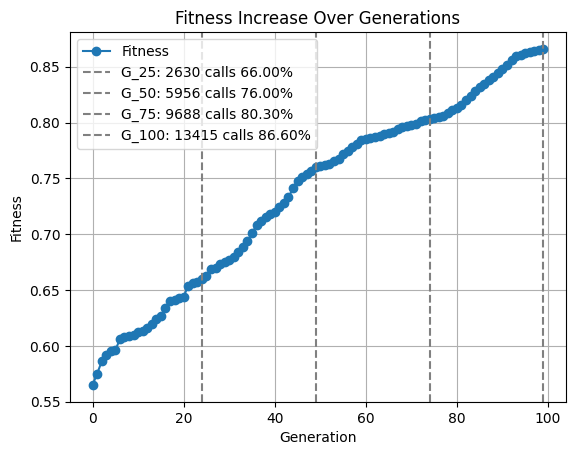

-----------------
Problem 2


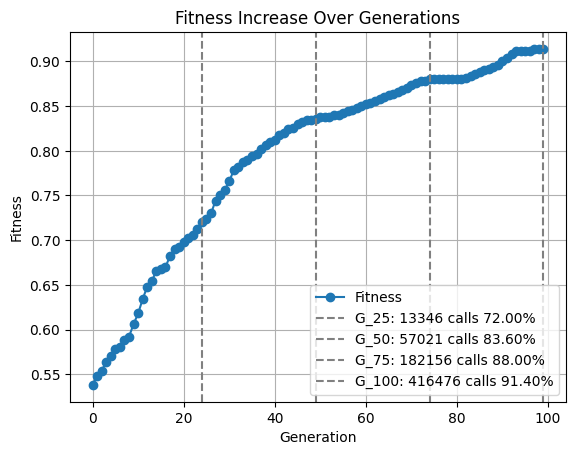

-----------------
Problem 5


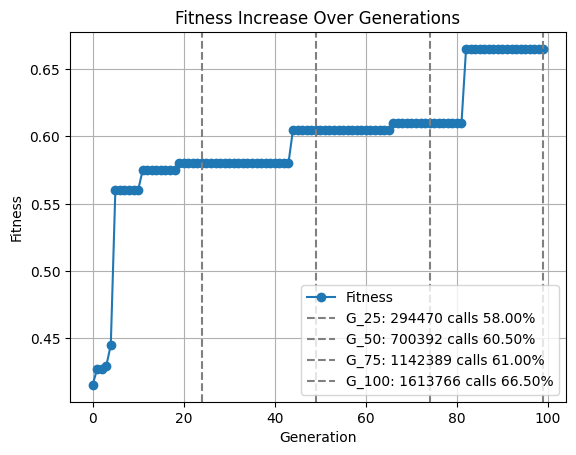

-----------------
Problem 10


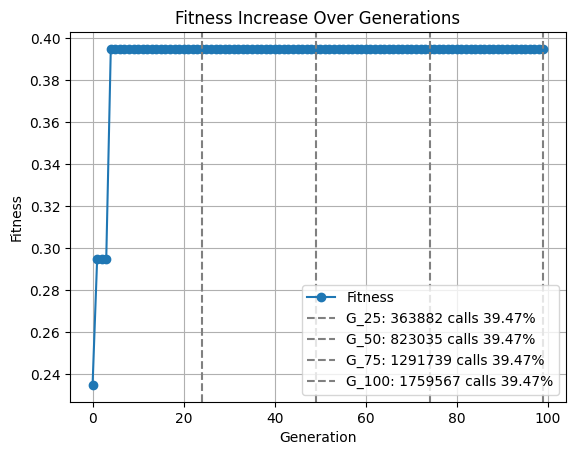

In [330]:
for a in A:
  print("-----------------")
  print(f"Problem {a}")

  fitness=lab9_lib.make_problem(a)
  genomes = []

  islands = [[] for _ in range(number_of_islands)]  # Initialize 10 empty lists within the islands list

  for isl in range(number_of_islands):
      population = []
      for _ in range(starting_population):
          ind = choices([0, 1], k=loci)
          fitness_val = fitness(ind)
          population.append((ind, fitness_val))

      islands[isl] = sorted(population, key=lambda x: x[1], reverse=True)[:10]  # Take the best 2 individuals

  # Flatten the list of lists into a single list of genomes
  genomes = [ind for isl in islands for ind in isl]

  # Sort the genomes based on fitness in descending order
  top_genomes = sorted(genomes, key=lambda x: x[1], reverse=True)[:10]
  
  #plot values
  fitness_values = []
  fitness_calls = []
 
  for generation in range(generations):

    future = []

    for i in range(bests):
      found_future = False
      for j in range(bests):
          if i != j:
              main_ind = top_genomes[i][0]
              secondary_ind = top_genomes[j][0]
              fit_calls = 0
              for step in steps:
                 if fit_calls>100:
                    fit_calls=0
                    continue
                    
                 if not found_future:
                    new_genomes = crossover_genomes(main_ind, secondary_ind, step)
                    for idx in range(len(new_genomes)):
                      ind = new_genomes[idx]
                      fit = fitness(ind)
                      fit_calls +=1

                      if fit > top_genomes[i][1]:
                          future.append((ind, fit))
                          found_future=True
                          break
                      
                      mutated = mutate_genome(ind)
                      if ind != mutated:
                         fit = fitness(mutated)
                         fit_calls +=1
                         if fit> top_genomes[i][1]:
                            future.append((mutated,fit))
                            found_future=True
                            break
      if not found_future:
          future.append(top_genomes[i])

    top_genomes = deepcopy(sorted(future, key=lambda x:x[1], reverse=True))[:10]
    #plot values update
    fitness_values.append(top_genomes[0][1])
    fitness_calls.append(fitness.calls)

  plt.plot(range(generations), fitness_values, marker='o', label='Fitness')
  plt.xlabel('Generation')
  plt.ylabel('Fitness')
  plt.title('Fitness Increase Over Generations')
  plt.grid(True)

  # Plot fitness calls at specific generations
  generation_markers = [24, 49, 74, 99]  # Update this list with your specific generations
  for gen in generation_markers:
      if gen < generations:
          plt.axvline(x=gen, color='gray', linestyle='--', label=f'G_{gen+1}: {fitness_calls[gen]} calls {fitness_values[gen]:.2%}')

  plt.legend()
  plt.show()